### Build a Simple Workflow or Graph Using LangGraph

#### State
First, define the State of the graph.

The State schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the TypedDict class from python's typing module as our schema, which provides type hints for the keys.

In [1]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str

#### Nodes
Nodes are just python functions.

The first positional argument is the state, as defined above.

Because the state is a TypedDict with schema as defined above, each node can access the key, graph_state, with state['graph_state'].

Each node returns a new value of the state key graph_state.

By default, the new value returned by each node will override the prior state value.

In [59]:
def start_play(state:State):
    print("Start_Routine node has been called")
    return {"graph_info":state['graph_info'] + " I am planning to play"}

def cricket(state:State):
    print("My Cricket node has been called")
    return {"graph_info":state['graph_info'] + " Cricket"}

def badminton(state:State):
    print("My badminton node has been called")
    return {"graph_info":state['graph_info'] + " Badminton"}

In [60]:
import random
from typing import Literal

def random_play(state:State)-> Literal['cricket','badminton']:
    graph_info=state['graph_info']

    if random.random()>0.5:
        return "cricket"
    else:
        return "badminton"

In [5]:
random_play({"graph_info":"I am planning to play"})

'cricket'

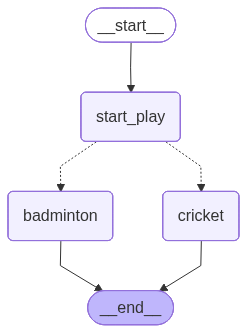

In [61]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

## Build Graph
graph=StateGraph(State)

## Adding the nodes
graph.add_node("start_play",start_play)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

## Schedule the flow of the graph

graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("cricket",END)
graph.add_edge("badminton",END)

## Compile the graph
graph_builder=graph.compile()

## View
display(Image(graph_builder.get_graph().draw_mermaid_png()))

### More Example

In [41]:
def start_routine(state:State):
    print("start_routine node has been called")
    return {"graph_info":state['graph_info'] + " I am planning something to play"}

def play_game(state:State):
    print("My play_game node has been called")
    return {"graph_info":state['graph_info'] + " play_game"}

def sleep(state:State):
    print("sleep node has been called")
    return {"graph_info":state['graph_info'] + " sleep"}

def eat_something(state:State):
    print("eat_something node has been called")
    return {"graph_info":state['gragh_info'] + "eat_something"}    

In [49]:
import random
from typing import Literal

def random_routine(state: State) -> Literal['sleep', 'play_game', 'eat_something']:
    graph_info=state['graph_info']
    energie = random.random()

    if energie<0.5:
        return "sleep"
    elif energie <0.7:
        return "eat_something"
    else :
        return "play_game"        
  

In [67]:
random_routine({"graph_info":"I am planning to something"})

'sleep'

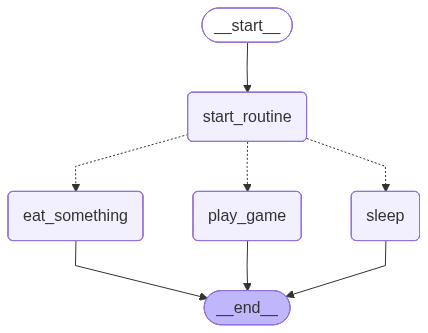

In [68]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

## Build Graph
graph=StateGraph(State)

## Adding the nodes
graph.add_node("start_routine",start_routine)
graph.add_node("play_game",play_game)
graph.add_node("sleep",sleep)
graph.add_node("eat_something",eat_something)

## Schedule the flow of the graph

graph.add_edge(START,"start_routine")
graph.add_conditional_edges("start_routine",random_routine)
graph.add_edge("play_game",END)
graph.add_edge("sleep",END)
graph.add_edge("eat_something",END)

## Compile the graph
graph_builder=graph.compile() 

## View
display(Image(graph_builder.get_graph().draw_mermaid_png()))